In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the data
df= pd.read_csv('https://raw.githubusercontent.com/Sanjushinde0136/Data-Science-Assignment/refs/heads/main/MLR/ToyotaCorolla%20-%20MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
#Data visualization

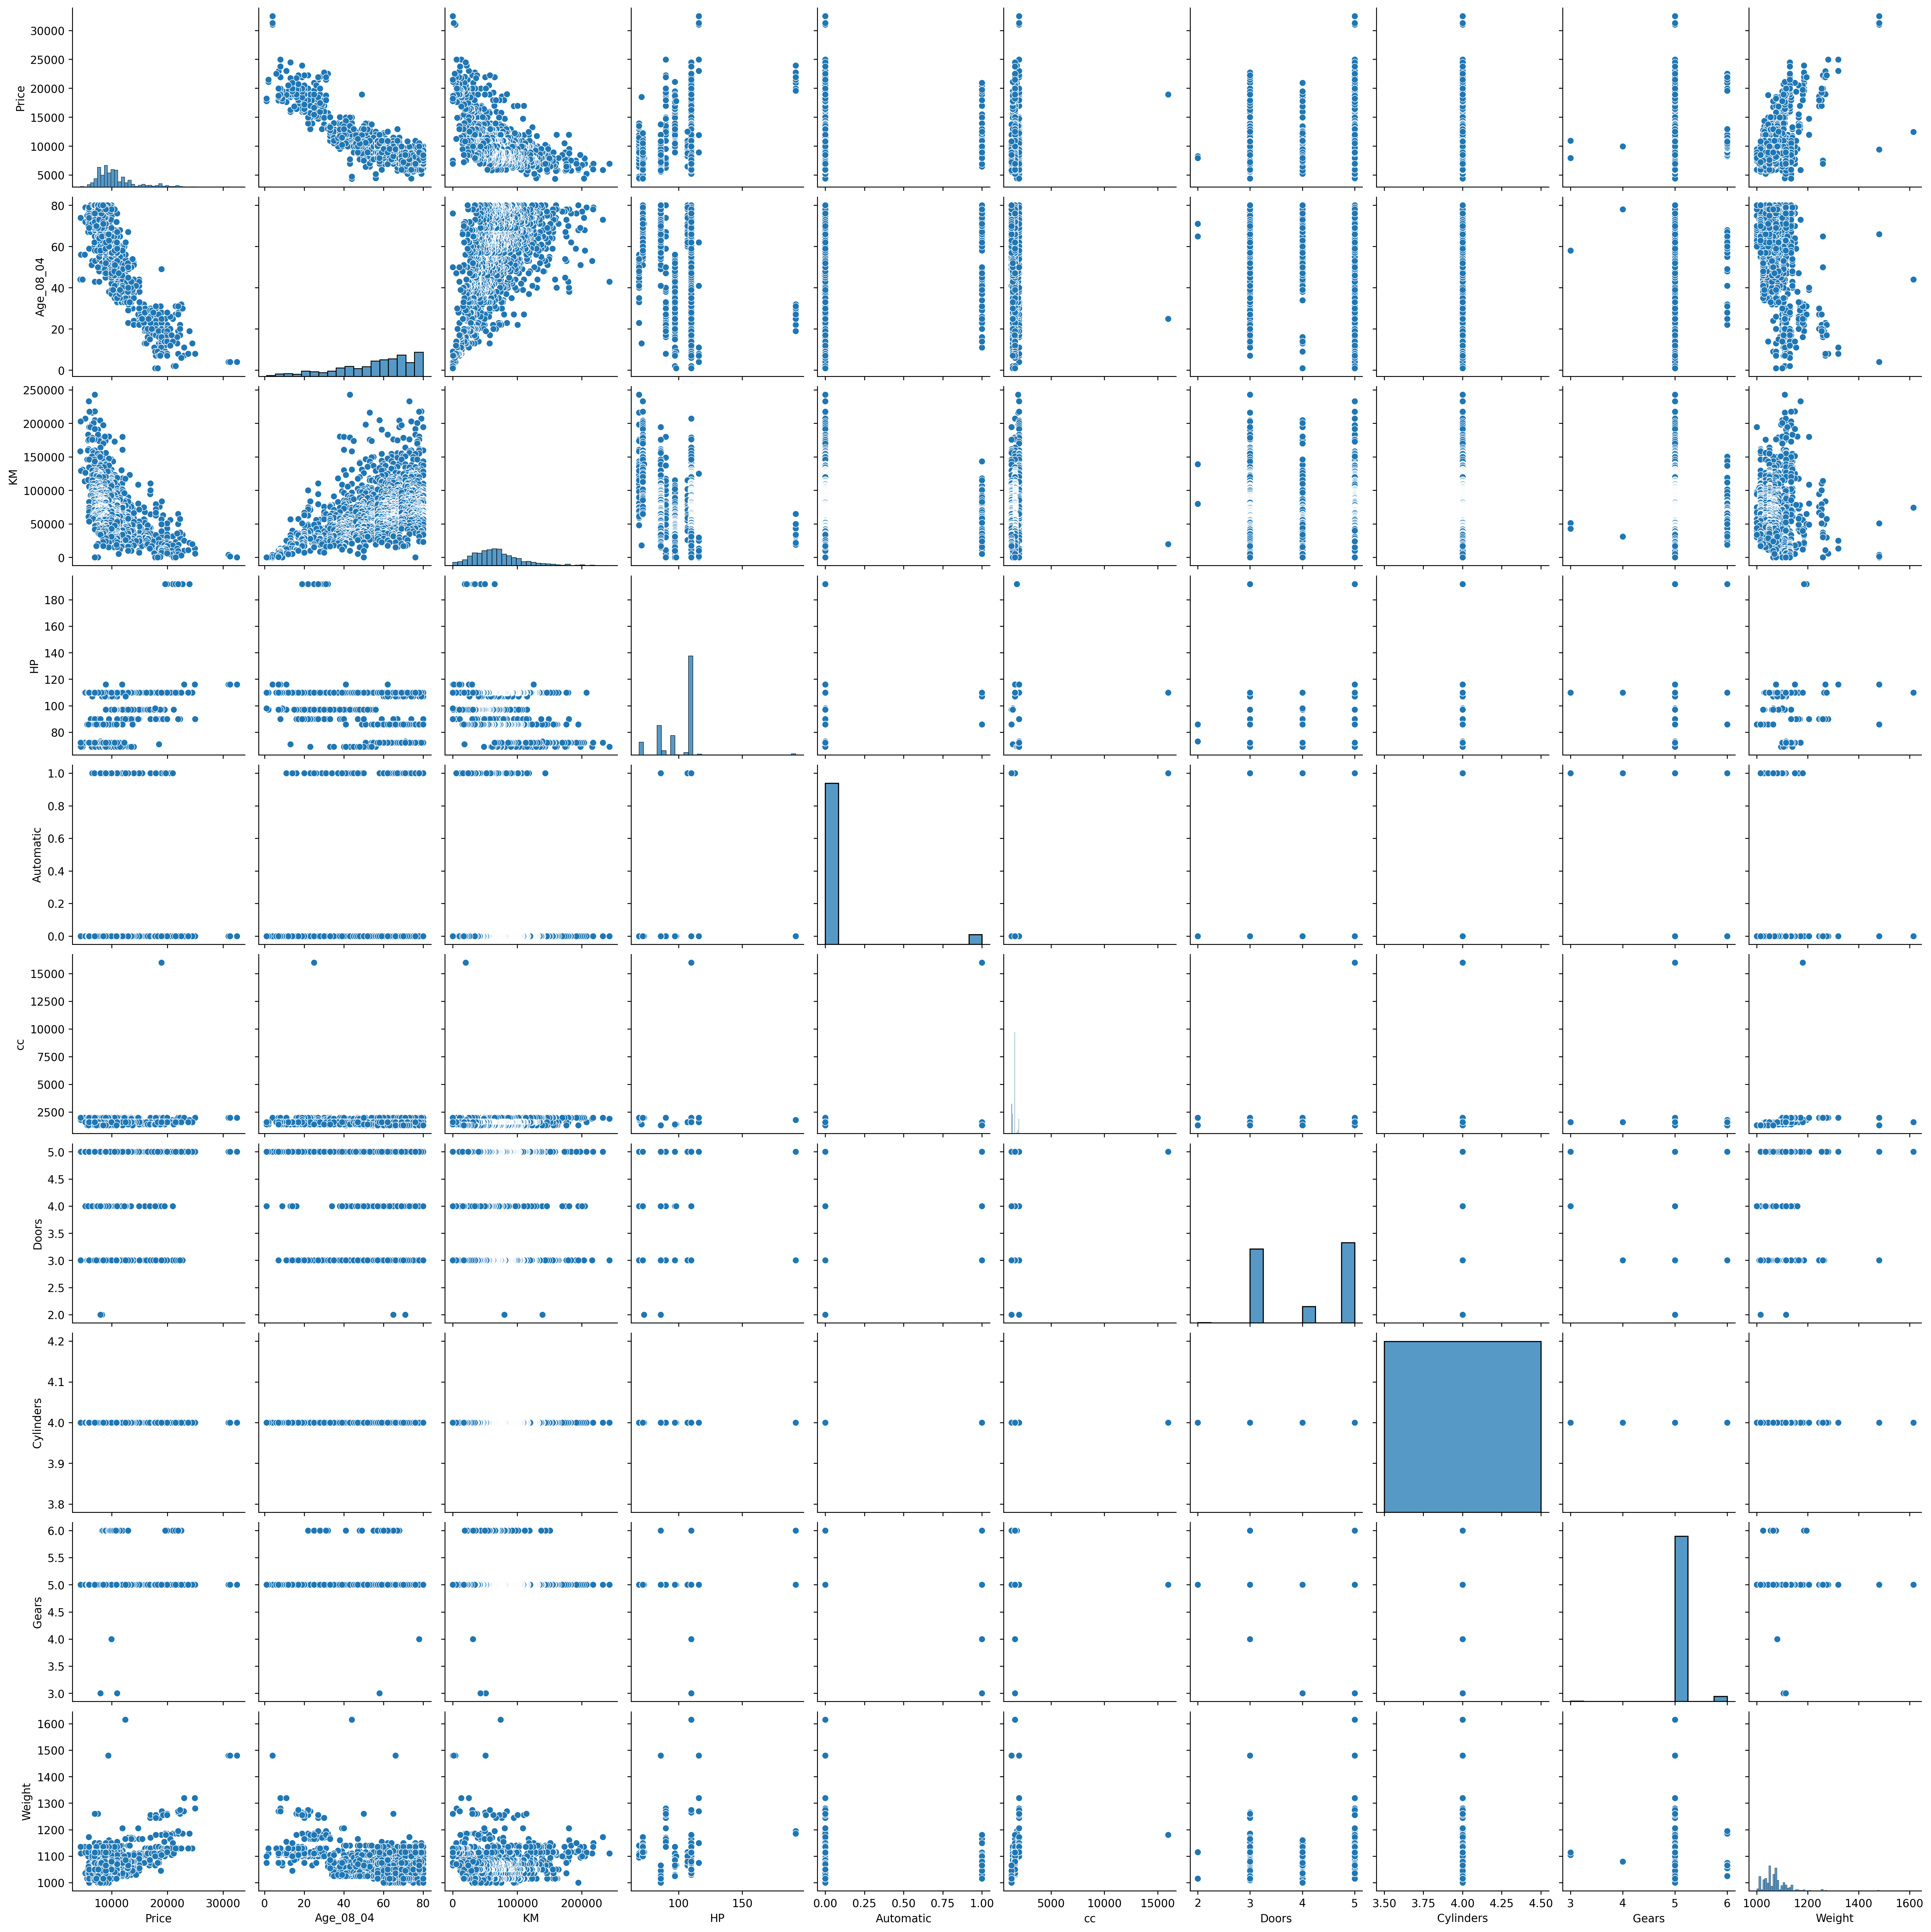

In [7]:
sns.pairplot(df)

**MODEL BUILDING**

In [8]:
import statsmodels.formula.api as smf

In [9]:
model=smf.ols('Age_08_04~Price+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=df).fit()

In [10]:
model.params

Intercept     2.812990
Price        -0.004910
KM            0.000007
HP            0.168330
Automatic     5.069088
cc           -0.000566
Doors         0.049654
Cylinders    11.251961
Gears         3.127311
Weight        0.026080
dtype: float64

In [11]:
model.pvalues

Intercept     1.045798e-08
Price        1.214440e-289
KM            4.316036e-01
HP            2.167812e-23
Automatic     3.728598e-07
cc            3.182135e-01
Doors         8.443517e-01
Cylinders     1.045798e-08
Gears         1.277205e-02
Weight        3.442150e-05
dtype: float64

**LINEAR REGRESSION**

In [12]:
#Weight
wt= smf.ols('Age_08_04~Weight+Price+HP', data=df).fit()
wt.pvalues

Intercept    7.901016e-27
Weight       1.695105e-07
Price        0.000000e+00
HP           1.053400e-26
dtype: float64

In [13]:
#Automatic
at= smf.ols('Age_08_04~KM+Price+HP', data=df).fit()
at.pvalues

Intercept    3.425984e-257
KM            7.333761e-03
Price         0.000000e+00
HP            2.249489e-25
dtype: float64

**Calculate VIF(Variance influence factor)**

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [16]:
data = df.drop(columns=['Age_08_04'])
data

,Price,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,16916,Petrol,86,0,1300,3,4,5,1015


**List Comprehension**

In [17]:
lst = []

for i in range(1,10):
    lst.append(i*2)

In [18]:
type(lst)
lst

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [19]:
lst_com = [i*2 for i in range(1,10)]
type(lst_com)
lst_com

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [20]:
sqr = [i**2 for i in range(1,26)]
sqr

[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625]

In [21]:
data

,Price,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,16916,Petrol,86,0,1300,3,4,5,1015


In [22]:
vif = pd.DataFrame()
vif

""


In [23]:
data.columns

Index(['Price', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [24]:
vif['Features'] = data.columns
vif

,Features
0,Price
1,KM
2,Fuel_Type
3,HP
4,Automatic
5,cc
6,Doors
7,Cylinders
8,Gears
9,Weight


In [25]:
len(data.columns)

10

In [26]:
range(len(data.columns))

range(0, 10)

In [27]:
data

,Price,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,16916,Petrol,86,0,1300,3,4,5,1015


In [28]:
vif

,Features
0,Price
1,KM
2,Fuel_Type
3,HP
4,Automatic
5,cc
6,Doors
7,Cylinders
8,Gears
9,Weight


**Subset Selection**

In [29]:
#Weight
wt= smf.ols('Age_08_04~Weight+Price+HP', data=df).fit()
wt.rsquared

0.7883459112909788

In [30]:
#Automatic
at= smf.ols('Age_08_04~KM+Price+HP', data=df).fit()
at.rsquared

0.7853435417535529

In [31]:
at.pvalues

Intercept    3.425984e-257
KM            7.333761e-03
Price         0.000000e+00
HP            2.249489e-25
dtype: float64

**MODEL VALIDATION TECHNIQUES**

**1.Residual Analysis**

In [32]:
#Normality Test

In [33]:
model=smf.ols('Age_08_04~Price+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=df).fit()
model.rsquared

0.7928389317575962

In [34]:
#Statsmodel
import statsmodels.api as sm

In [35]:
df.head(5)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [36]:
model.fittedvalues

0       42.028562
1       40.972384
2       39.784054
3       34.915229
4       40.875319
          ...    
1431    67.387544
1432    50.691368
1433    62.193072
1434    68.330370
1435    76.243219
Length: 1436, dtype: float64

In [37]:
model.params

Intercept     2.812990
Price        -0.004910
KM            0.000007
HP            0.168330
Automatic     5.069088
cc           -0.000566
Doors         0.049654
Cylinders    11.251961
Gears         3.127311
Weight        0.026080
dtype: float64

In [38]:
model.resid

0      -19.028562
1      -17.972384
2      -15.784054
3       -8.915229
4      -10.875319
          ...    
1431     1.612456
1432    21.308632
1433     8.806928
1434     1.669630
1435    -0.243219
Length: 1436, dtype: float64

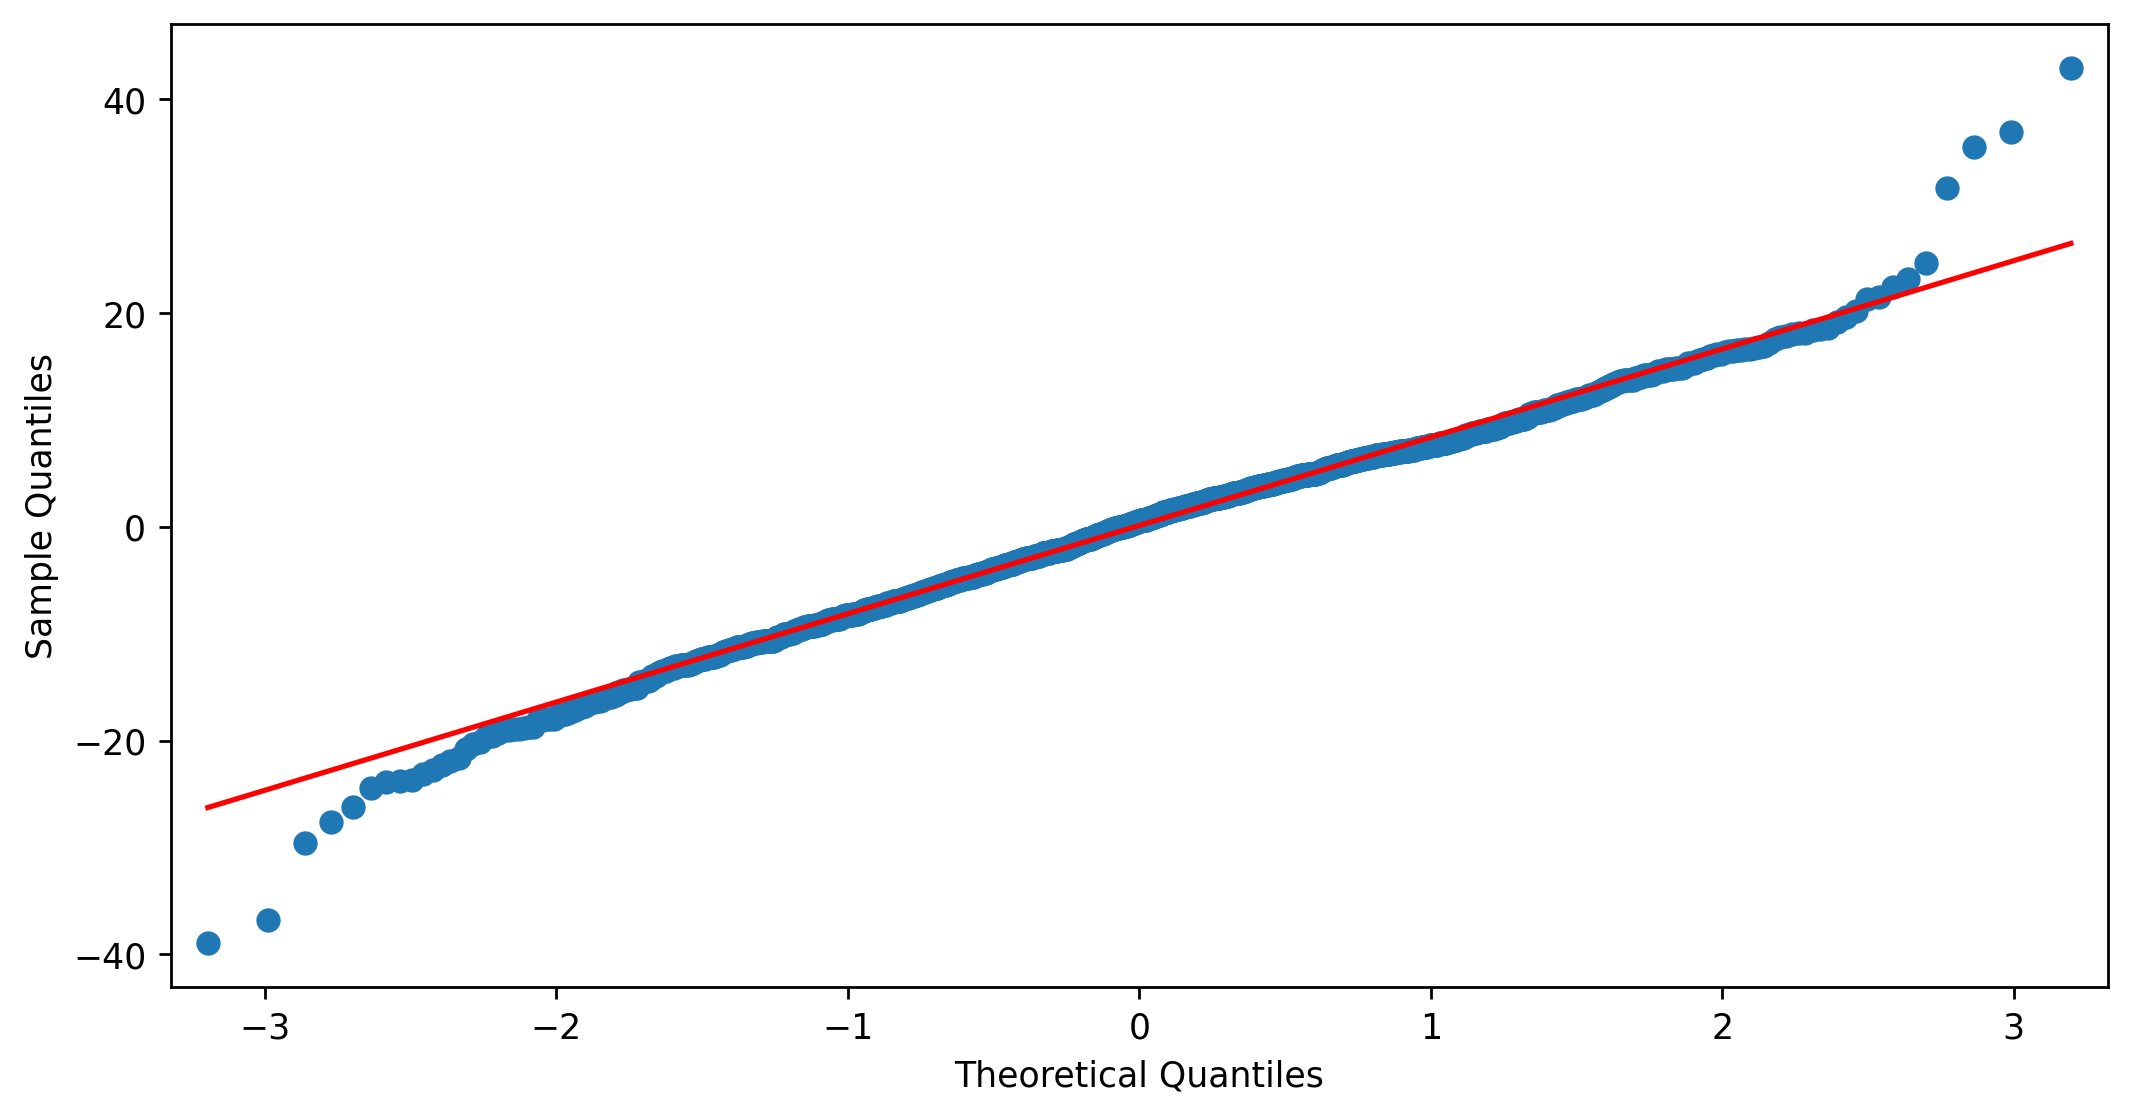

In [39]:
#Q-Q plot
sm.qqplot(model.resid,line = 'q');

In [40]:
#get index for higher residuals

In [41]:
np.argmax(model.resid), np.max(model.resid)

(109, 42.88757218430872)

**2. Residual plot of Homoscedasticity
Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.**

In [42]:
model.fittedvalues  

0       42.028562
1       40.972384
2       39.784054
3       34.915229
4       40.875319
          ...    
1431    67.387544
1432    50.691368
1433    62.193072
1434    68.330370
1435    76.243219
Length: 1436, dtype: float64

In [43]:
model.resid   #error

0      -19.028562
1      -17.972384
2      -15.784054
3       -8.915229
4      -10.875319
          ...    
1431     1.612456
1432    21.308632
1433     8.806928
1434     1.669630
1435    -0.243219
Length: 1436, dtype: float64

Text(0.5, 1.0, 'Constant Variance')

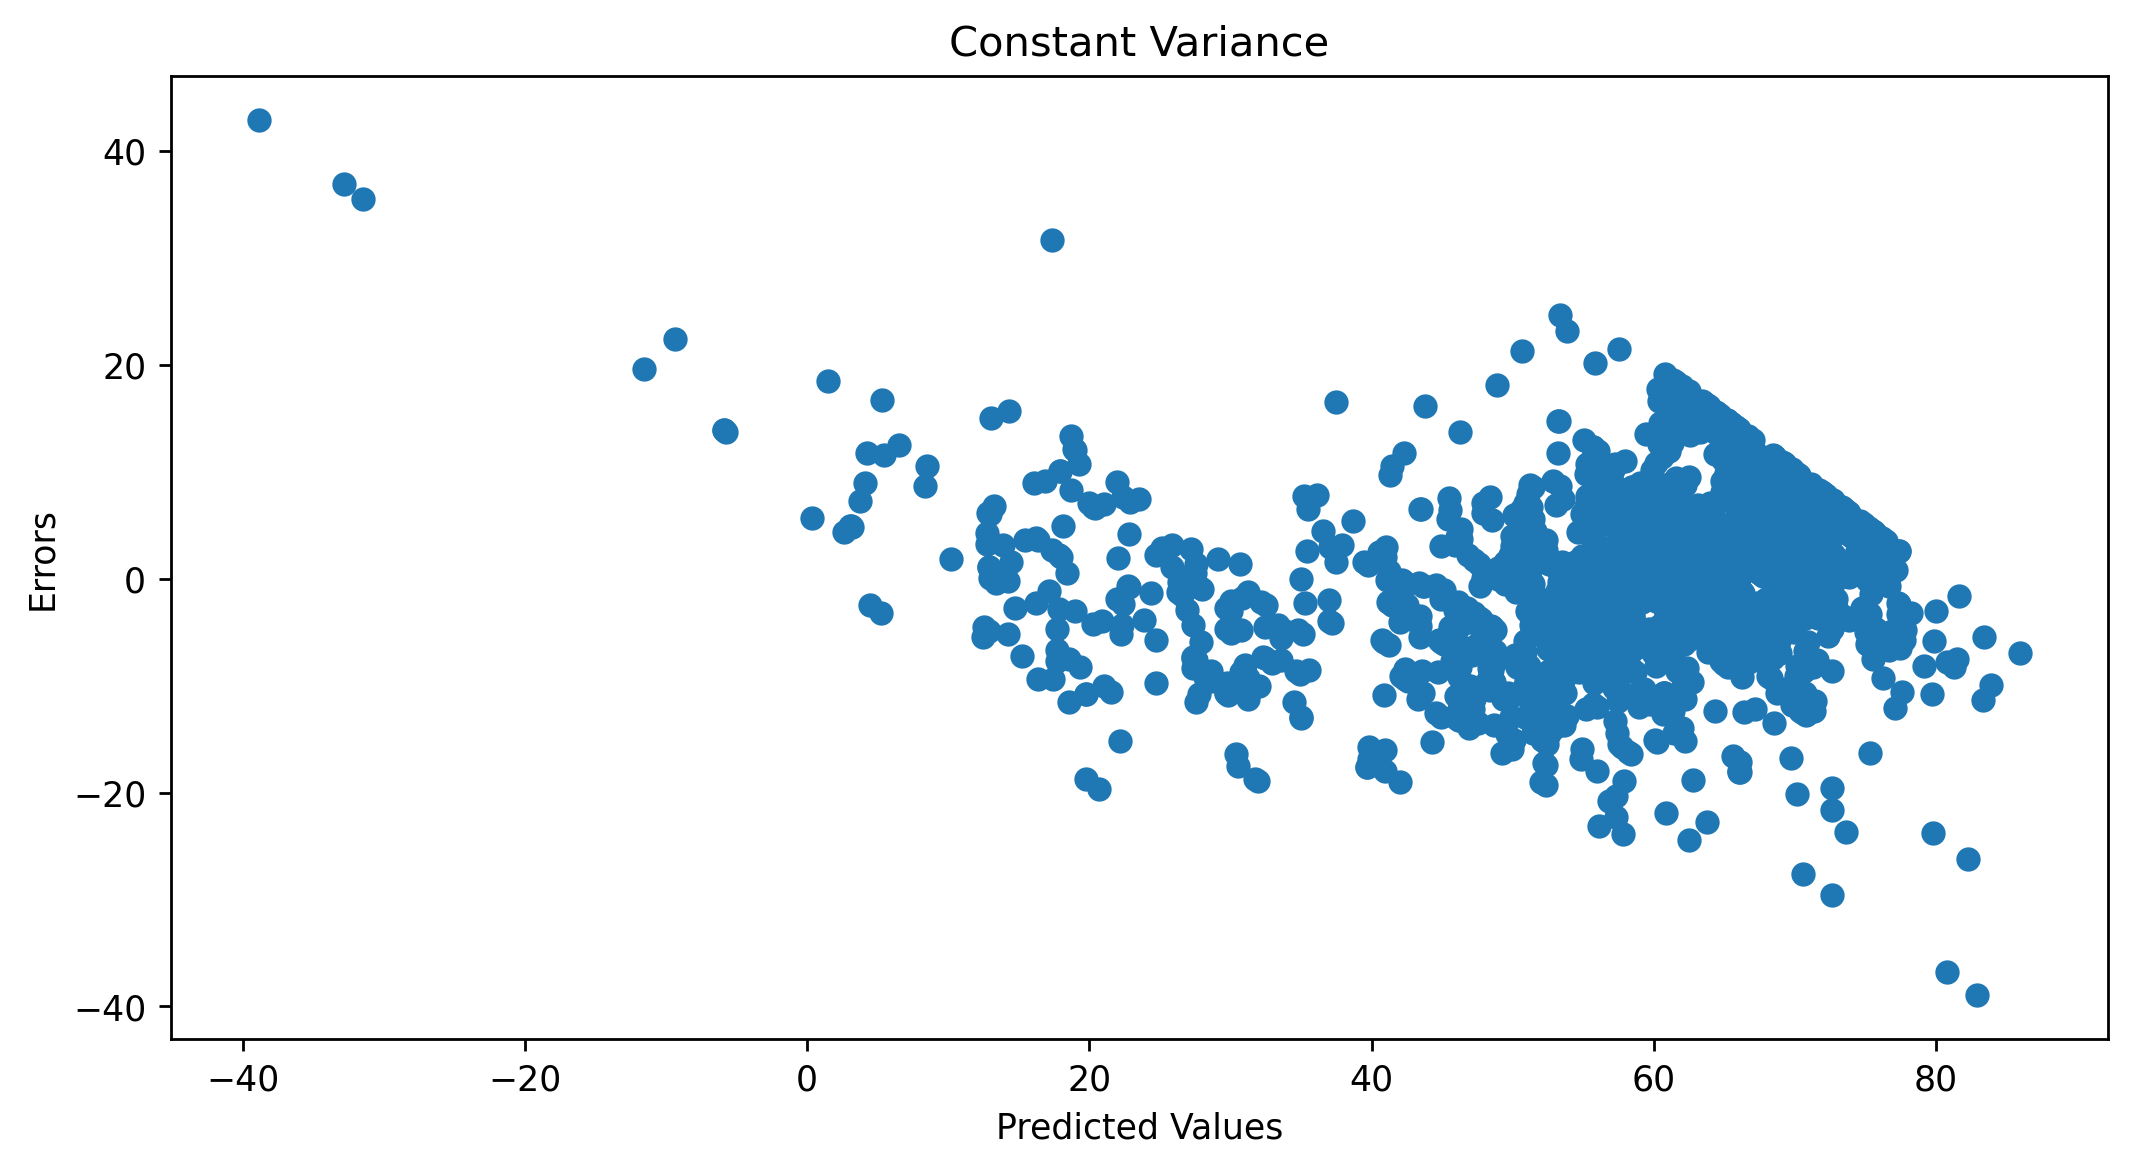

In [44]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.title('Constant Variance')

**3.Residual VS Regressor**


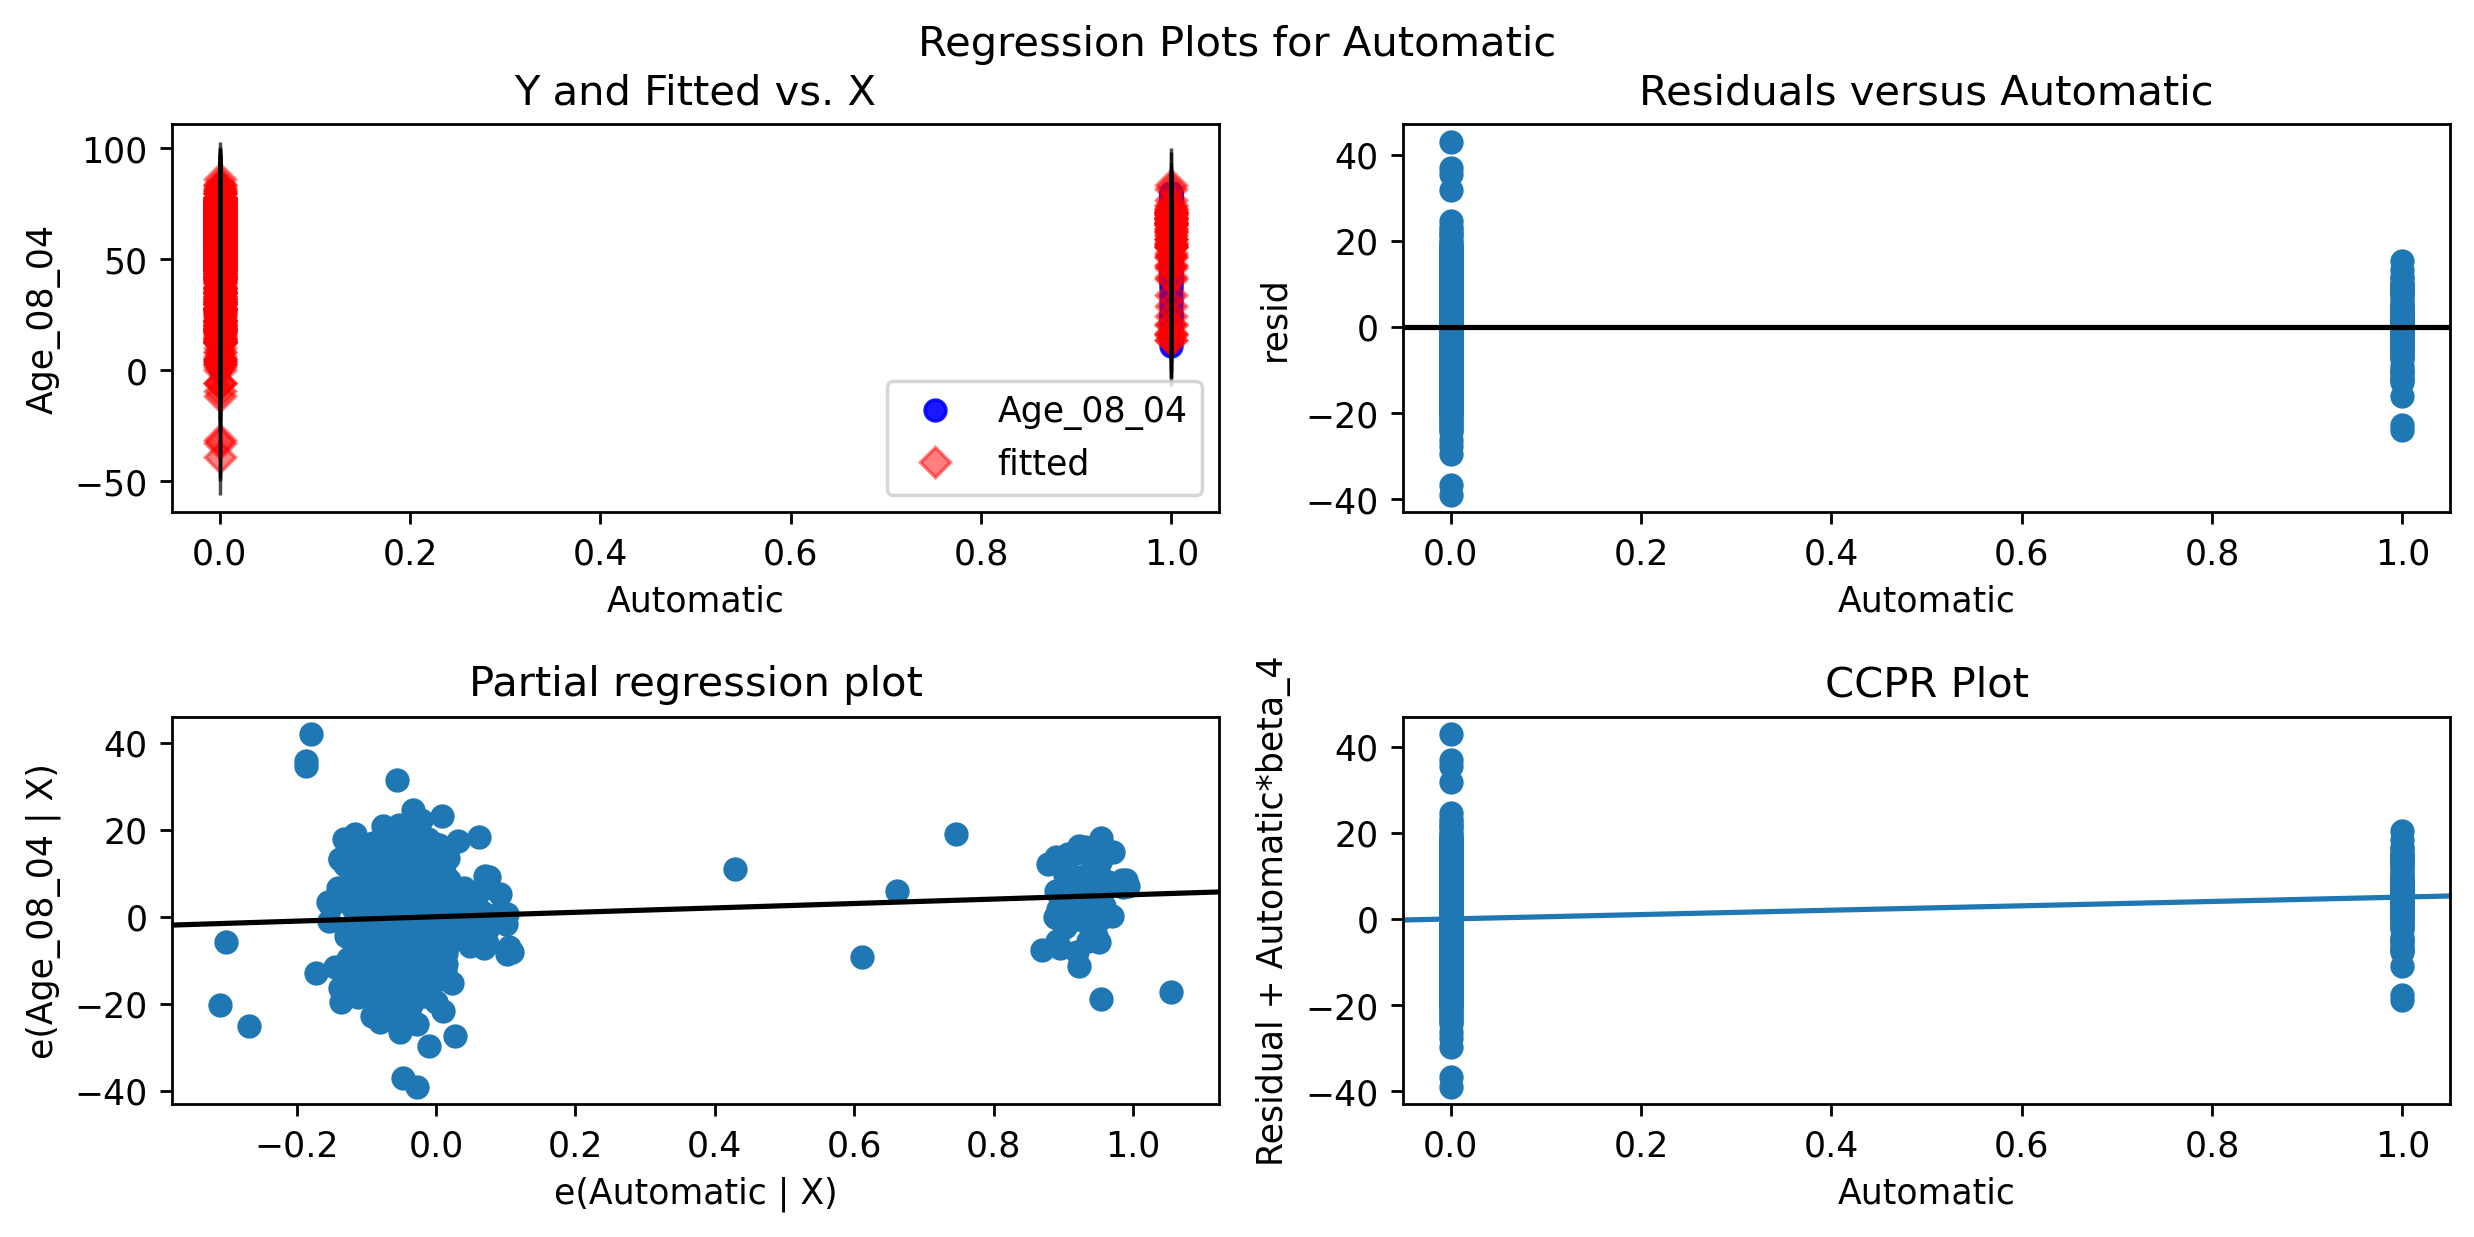

In [45]:
#Automatic
sm.graphics.plot_regress_exog(model,'Automatic');

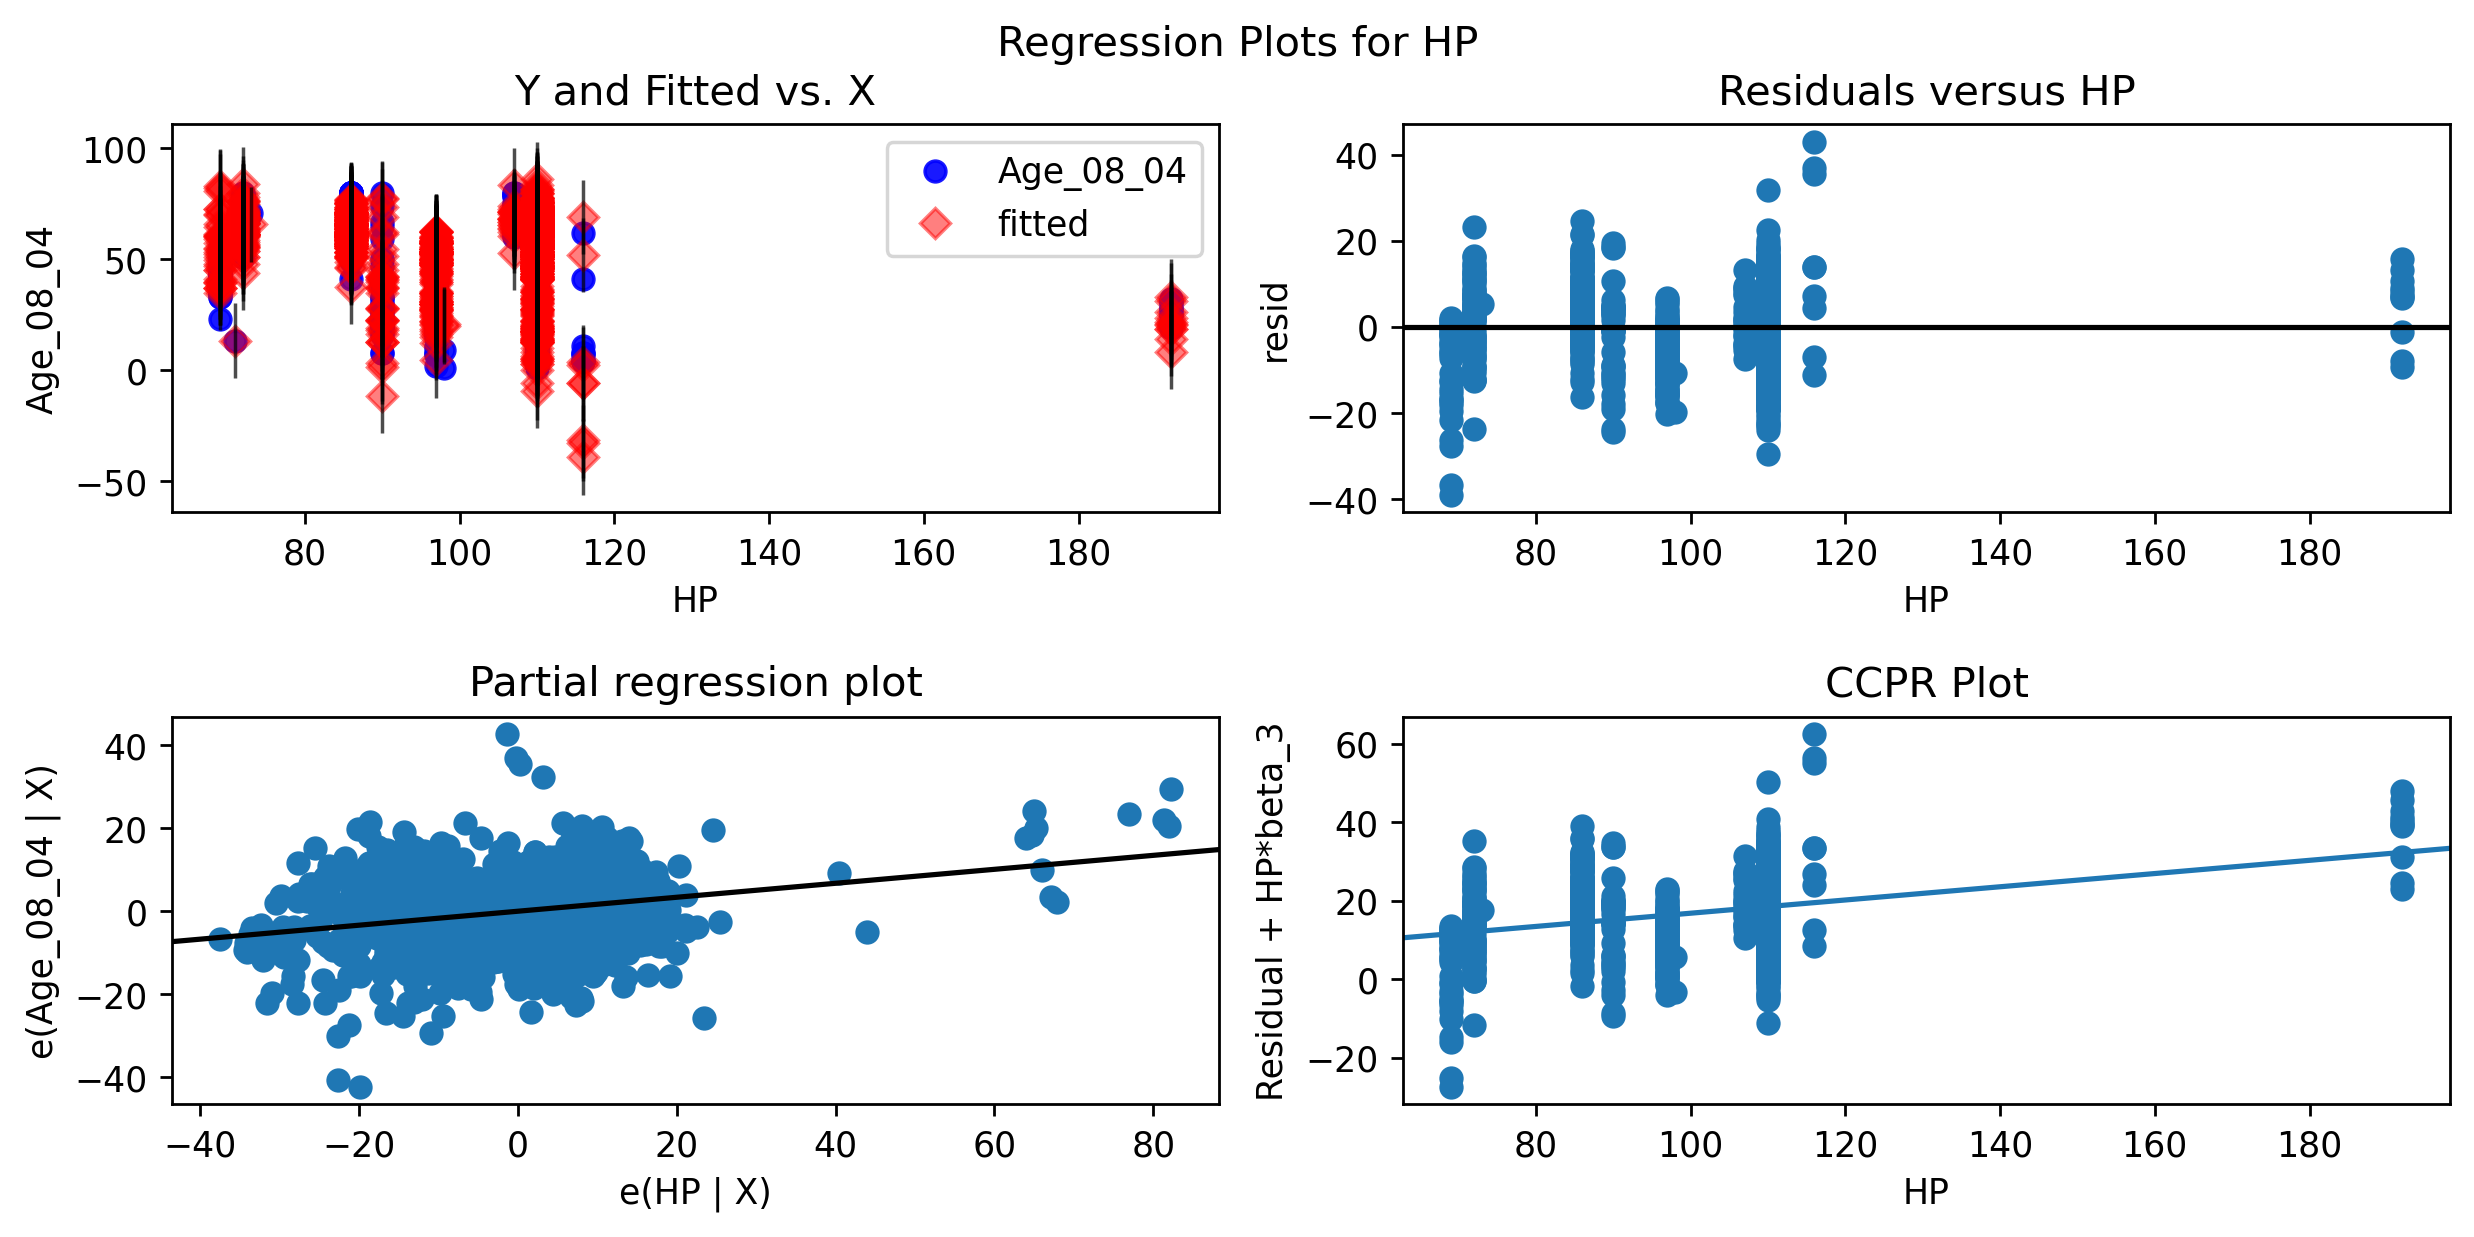

In [46]:
sm.graphics.plot_regress_exog(model,'HP');

**MODEL DELETION TECHNIQUES**

**Cook's Distance**

 **detecting influencers and outliers**

In [47]:
model

In [48]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [49]:
c

array([3.44269773e-03, 2.57825682e-03, 2.41524079e-03, ...,
       6.32796198e-04, 2.73873160e-05, 1.40451084e-06])

Text(0, 0.5, 'Cooks Distance')

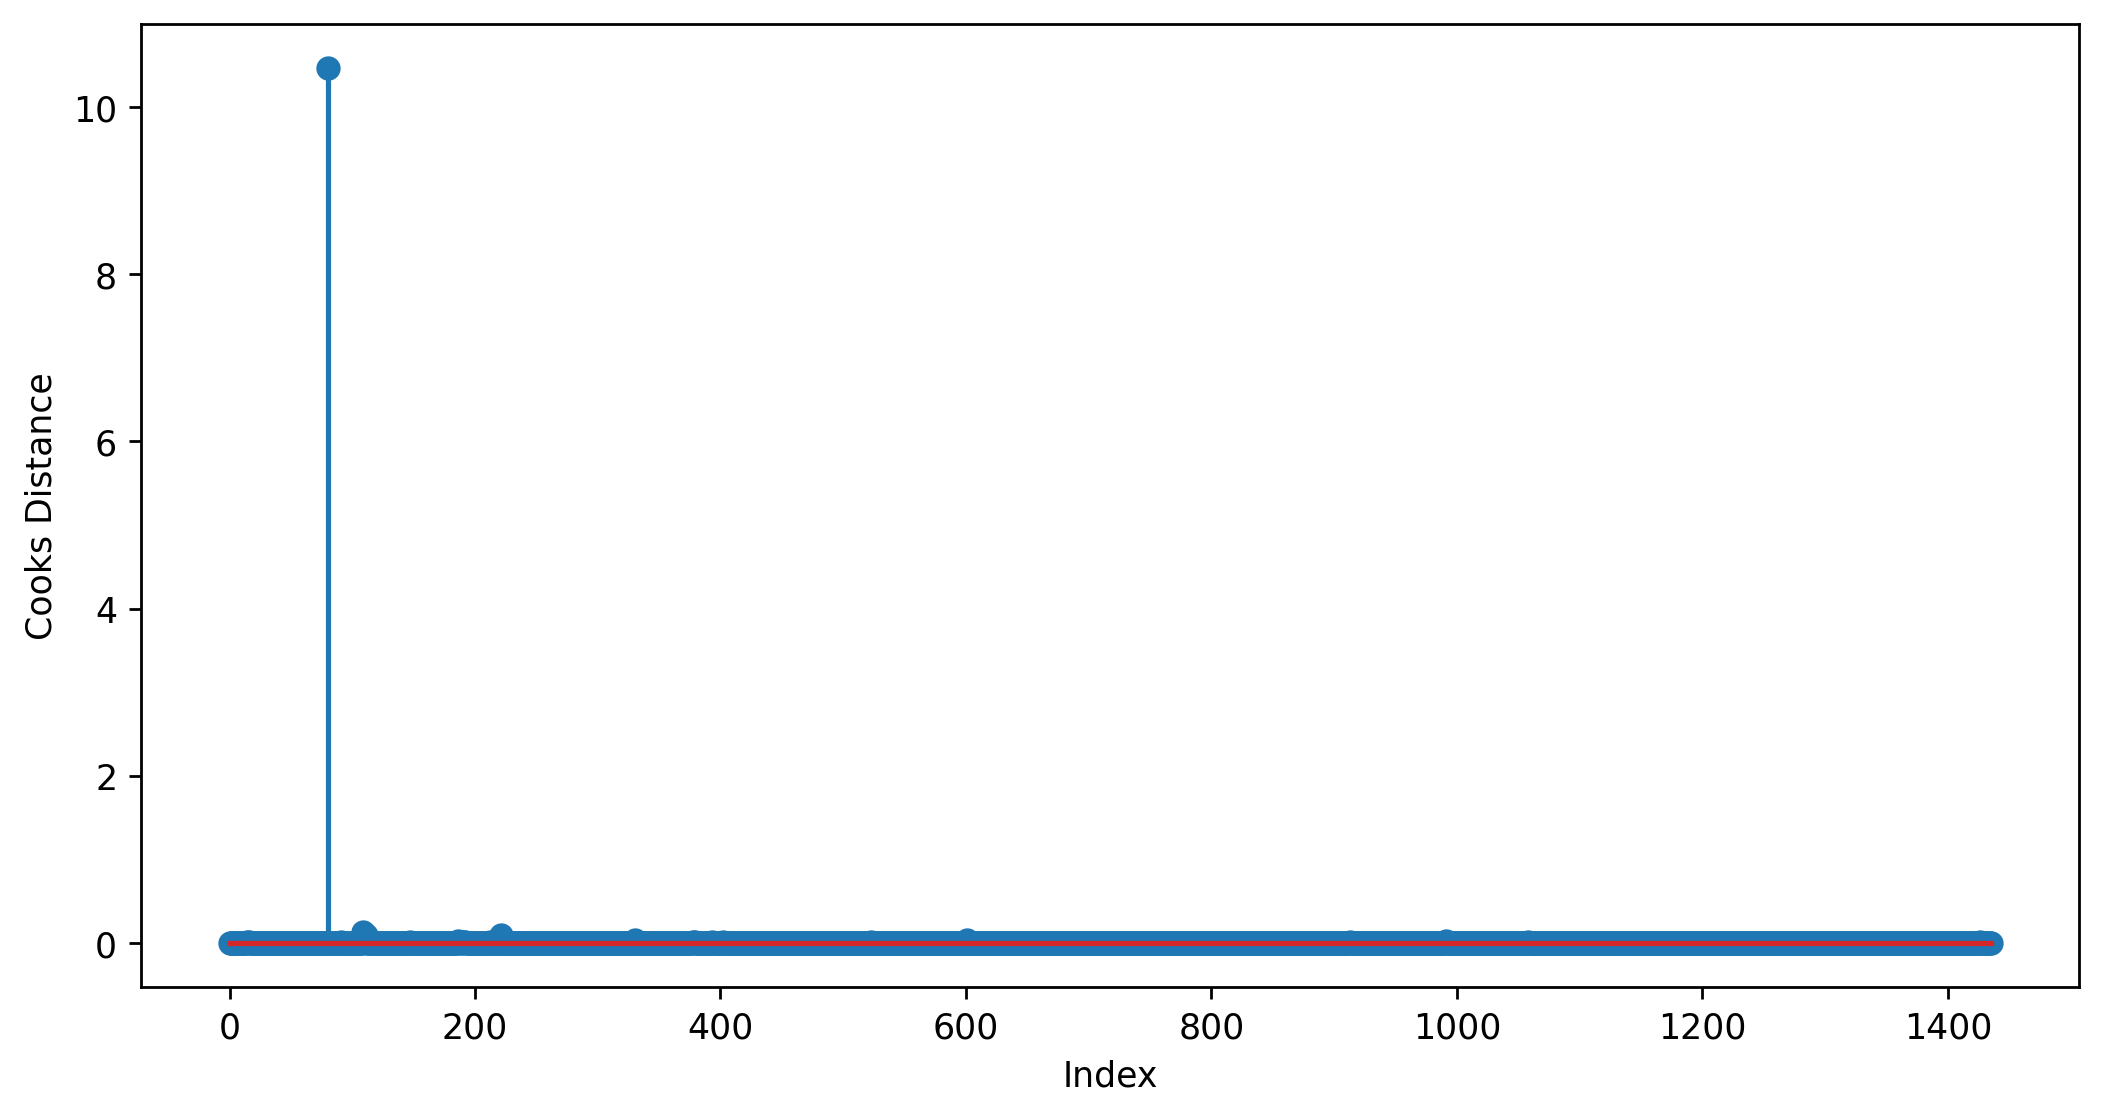

In [50]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [51]:
np.argmax(c), np.max(c)

(80, 10.46729752017803)

In [52]:
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [53]:
df.iloc[[80]]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
80,18950,25,20019,Petrol,110,1,16000,5,4,5,1180


**Improving the model**

In [54]:
df.drop(index=80,inplace=True)

In [55]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [56]:
#reset the index

In [57]:
df.reset_index(inplace=True)

In [58]:
df

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [59]:
df.drop(columns=['index'], inplace=True)

In [60]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [61]:
final_model=smf.ols('Age_08_04~Price+KM+HP+Automatic+cc+Doors+Cylinders+Gears',data=df).fit()

In [62]:
final_model.rsquared

0.7899362974475708

**Since the value is <1 , we can stop the diagnostic process and finalize the model**

**Predicting for new records**

In [63]:
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [64]:
test = pd.DataFrame({
    'HP' : [90,53.62,95,85,65],
    'KM' : [24530,30636,54175,72348,60058],
    'Weight' : [1162,1172,1150,1110,1200],
})
test

,HP,KM,Weight
0,90.00,24530,1162
1,53.62,30636,1172
2,95.00,54175,1150
3,85.00,72348,1110
4,65.00,60058,1200


In [65]:
final_model.params

Intercept     4.138501
Price        -0.004617
KM            0.000021
HP            0.164504
Automatic     5.387970
cc           -0.000294
Doors         0.295462
Cylinders    16.554003
Gears         3.172464
dtype: float64

# Interview Questions:

1.What is Normalization & Standardization and how is it helpful?

Ans: Normalization and standardization are techniques used to scale data, making it easier to analyze and interpret, particularly in the context of machine learning and statistical analysis.



2.What techniques can be used to address multicollinearity in multiple linear regression?

Ans: To address multicollinearity, techniques such as regularization or feature selection can be applied to select a subset of independent variables that are not highly correlated with each other. In this article, we will focus on the most common one – VIF (Variance Inflation Factors).